In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("CausalLM/7B", add_eos_token=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

data = load_dataset("json", data_files='dataset/summary-preference-set.json')


def generate_prompt(data_point):
    return f"""### Instruct:
Use student's preference to predict the summary of final choosed course.

### Student preference:
{data_point['preference']}

### Summary of Choosed Course:
{data_point['summary']}
""" 


data = data.map(
    lambda data_point: tokenizer(generate_prompt(data_point), max_length=2048, truncation=True),
    batch_size=128,
)

c:\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python311\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\apoll\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/ap

2048


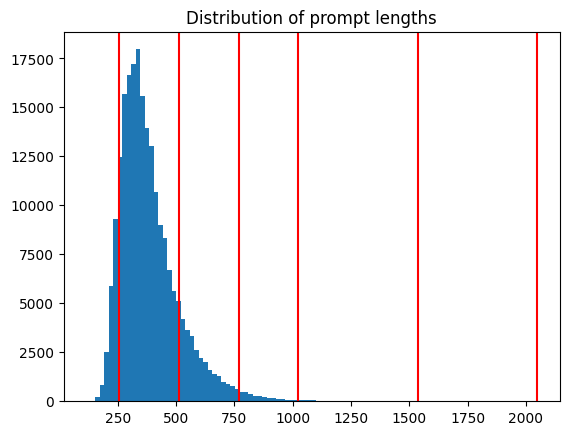

In [2]:
import matplotlib.pyplot as plt

lens = [len(p["input_ids"]) for p in data["train"]]
print(max(lens))
plt.hist(lens, bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(256, color="red")
plt.axvline(512, color="red")
plt.axvline(768, color="red")
plt.axvline(1024, color="red")
plt.axvline(1536, color="red")
plt.axvline(2048, color="red")

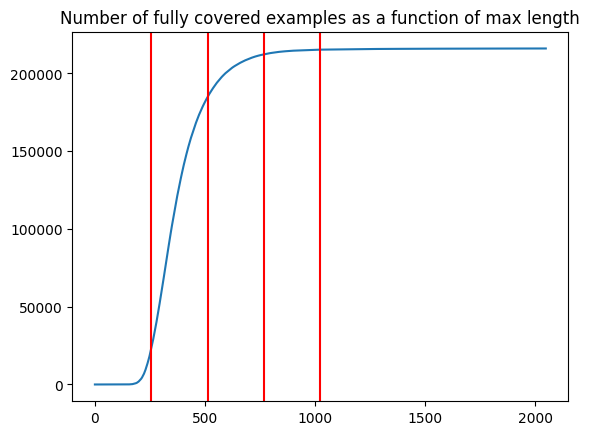

In [3]:
plt.plot([len([l for l in lens if l <= m]) for m in range(max(lens) + 1)])
plt.title("Number of fully covered examples as a function of max length")
plt.axvline(256, color="red")
plt.axvline(512, color="red")
plt.axvline(768, color="red")
plt.axvline(1024, color="red")

Percentage of tokens left out:

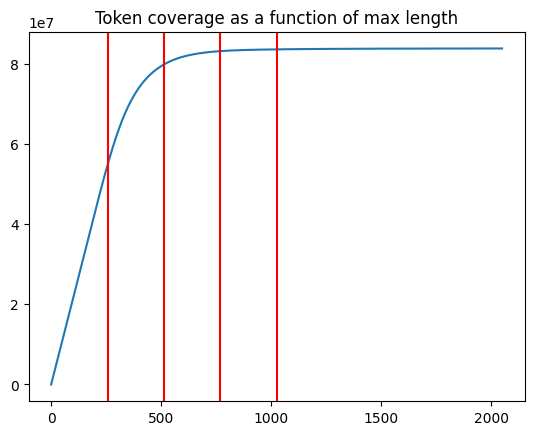

In [4]:
plt.plot([sum(min(l, m) for l in lens) for m in range(max(lens) + 1)])
plt.title("Token coverage as a function of max length")
plt.axvline(256, color="red")
plt.axvline(512, color="red")
plt.axvline(768, color="red")
plt.axvline(1024, color="red")